In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load both images (query and reference)
img = cv2.imread('8.png', cv2.IMREAD_GRAYSCALE)  # reference image
img1 = cv2.imread('9.png', cv2.IMREAD_GRAYSCALE)  # to be aligned

# ORB detector
orb = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orb.detectAndCompute(img, None)
kp2, des2 = orb.detectAndCompute(img1, None)

# Match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:50]  # Use only the best 50 matches

# Extract matched keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

# Homography matrix using RANSAC
H, mask = cv2.findHomography(pts2, pts1,

_IncompleteInputError: incomplete input (1570373009.py, line 25)

In [ ]:
edges = cv2.Canny(img, 100, 200)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=120, minLineLength=80, maxLineGap=10)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(output, (x1, y1), (x2, y2), (0,0,255), 2)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)), plt.title('Hough Lines')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1 = cv2.imread('10.png')  # reference
img2 = cv2.imread('11.png')  # comparison

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)

plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
plt.title("ORB Feature Matching")
plt.axis('off')
print("ORB feature matching visualized between two dog images")
plt.show()


Foreground segmentation performed using GraphCut with rectangle initialization


Foreground segmentation performed using GraphCut with rectangle initialization


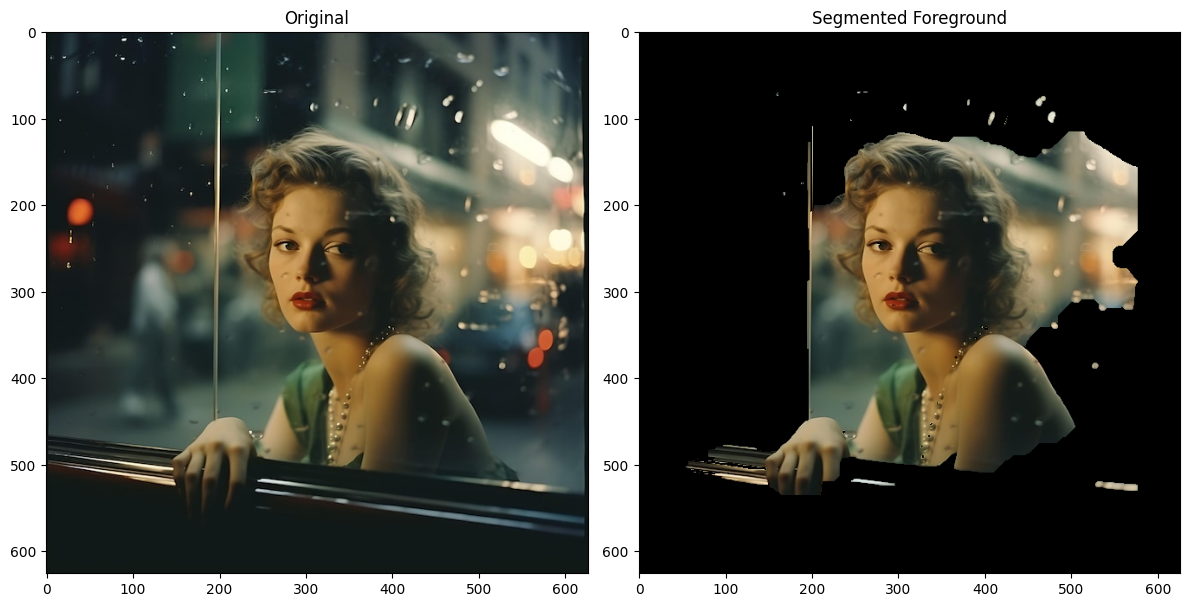

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('7.png')
mask = np.zeros(img.shape[:2], np.uint8)

# Background and foreground models
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Define rectangle around the subject (manually set based on image)
rect = (50, 50, img.shape[1]-100, img.shape[0]-100)  # (x, y, w, h)

# Apply GrabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Convert mask to binary: 1,3 -> foreground; 0,2 -> background
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented = img * mask2[:, :, np.newaxis]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB)), plt.title('Segmented Foreground')
print("Foreground segmentation performed using GraphCut with rectangle initialization")
plt.tight_layout()
plt.show()


Asymmetric circular grid detected


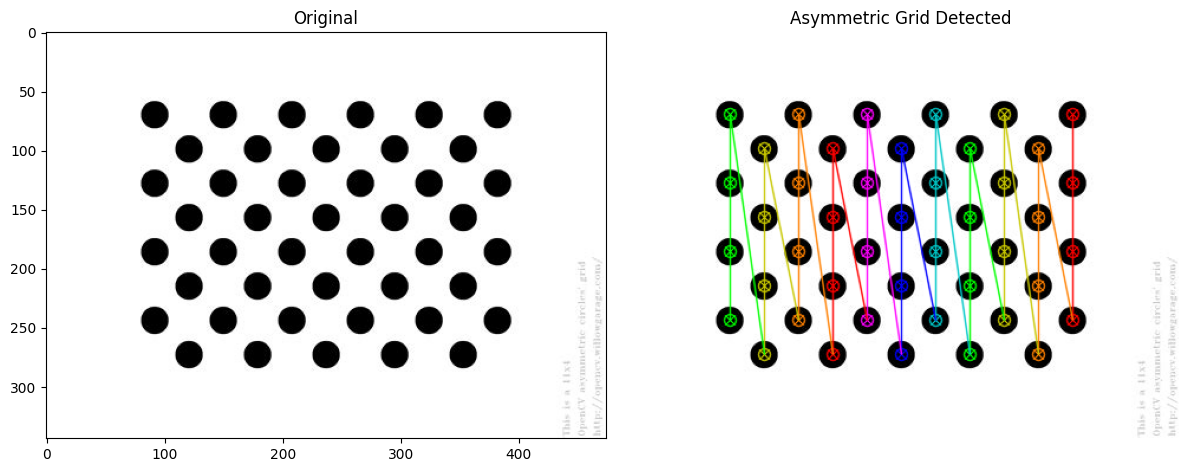

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('12.png')
if img is None:
    raise FileNotFoundError("Image '12.png' not found.")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Try both symmetric and asymmetric grid detection
pattern_size = (4, 11)  # rows, cols

ret_sym, centers_sym = cv2.findCirclesGrid(gray, pattern_size, flags=cv2.CALIB_CB_SYMMETRIC_GRID)
ret_asym, centers_asym = cv2.findCirclesGrid(gray, pattern_size, flags=cv2.CALIB_CB_ASYMMETRIC_GRID)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')

if ret_sym:
    vis = cv2.drawChessboardCorners(img.copy(), pattern_size, centers_sym, ret_sym)
    plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)), plt.title('Symmetric Grid Detected')
    print("Symmetric circular grid detected")
elif ret_asym:
    vis = cv2.drawChessboardCorners(img.copy(), pattern_size, centers_asym, ret_asym)
    plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB)), plt.title('Asymmetric Grid Detected')
    print("Asymmetric circular grid detected")
else:
    plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Pattern Not Found')
    print("Pattern not found")
plt.axis('off')
plt.tight_layout()
plt.show()

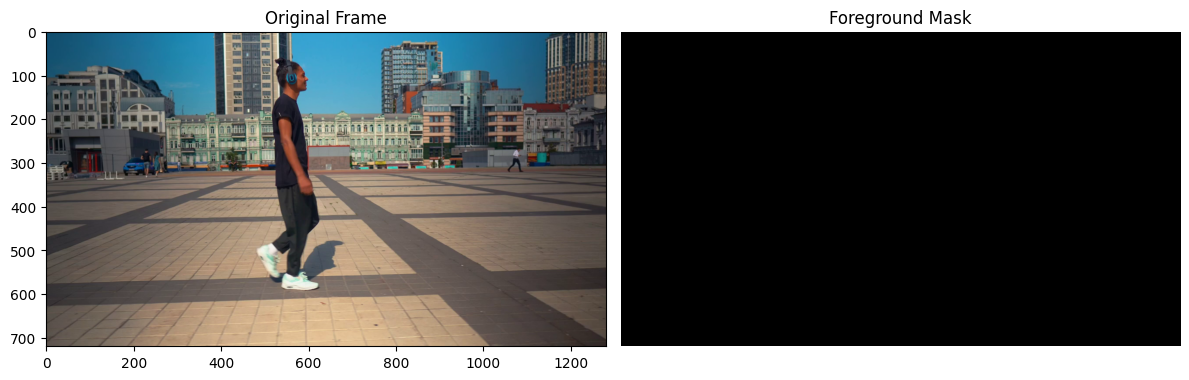

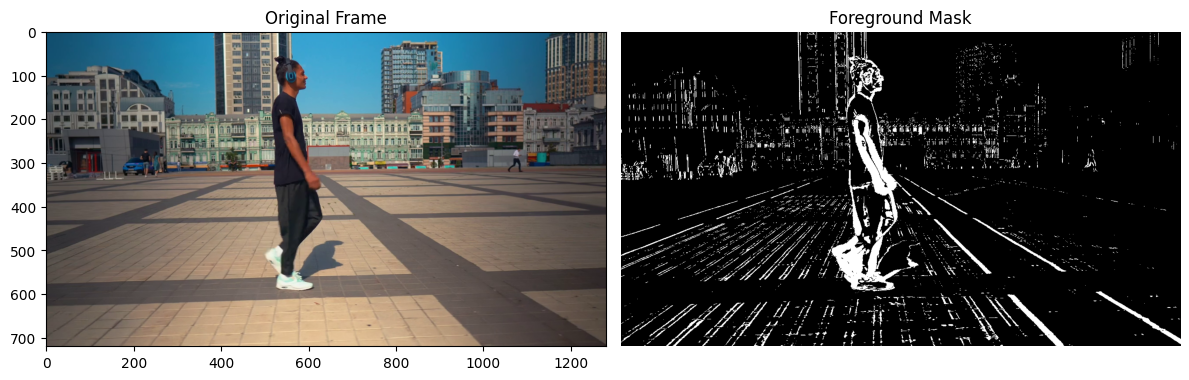

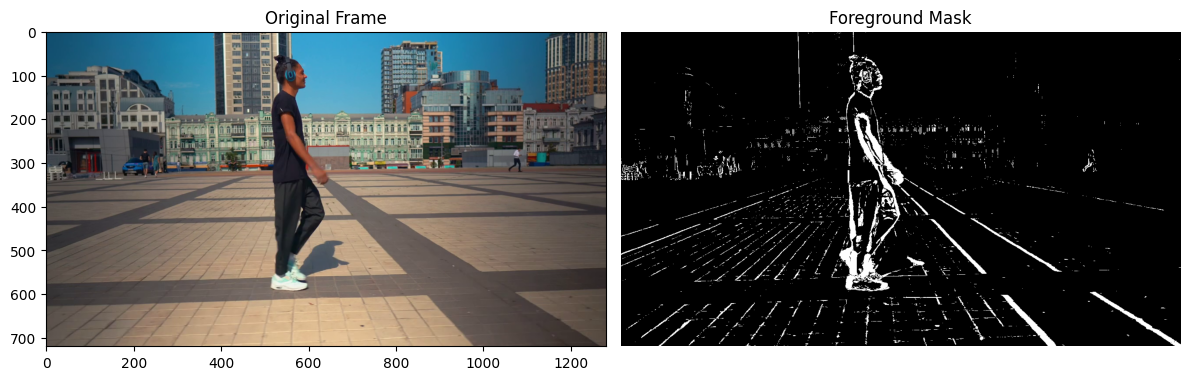

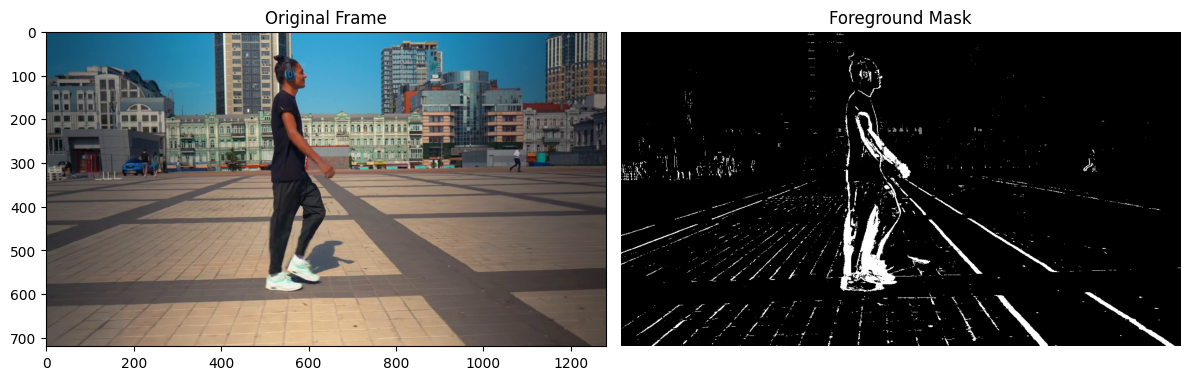

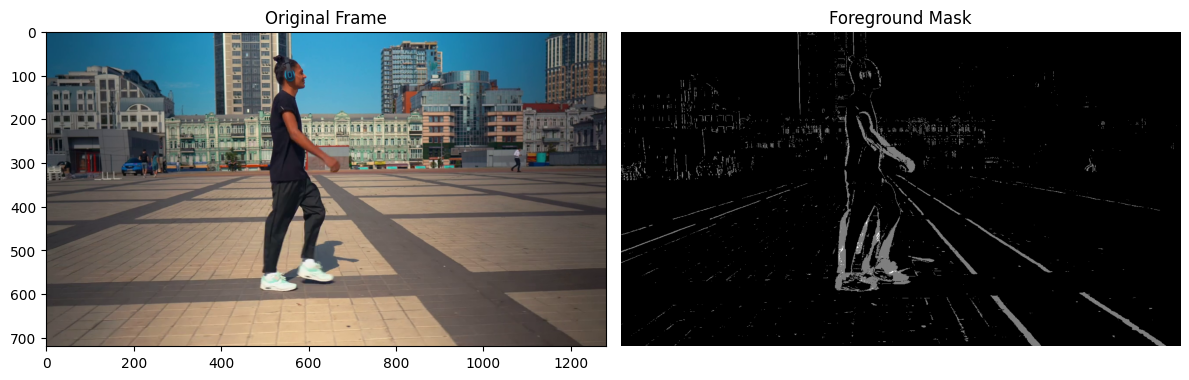

In [7]:
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('test.mp4')  # replace with your video file

if not cap.isOpened():
    raise FileNotFoundError("Video file 'test.mp4' not found or cannot be opened.")

fgbg = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50)

frame_count = 0
max_frames = 5  # Show first 5 frames

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)), plt.title('Original Frame')
    plt.subplot(1,2,2), plt.imshow(fgmask, cmap='gray'), plt.title('Foreground Mask')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    frame_count += 1

cap.release()

Perspective rectification using 4-point homography


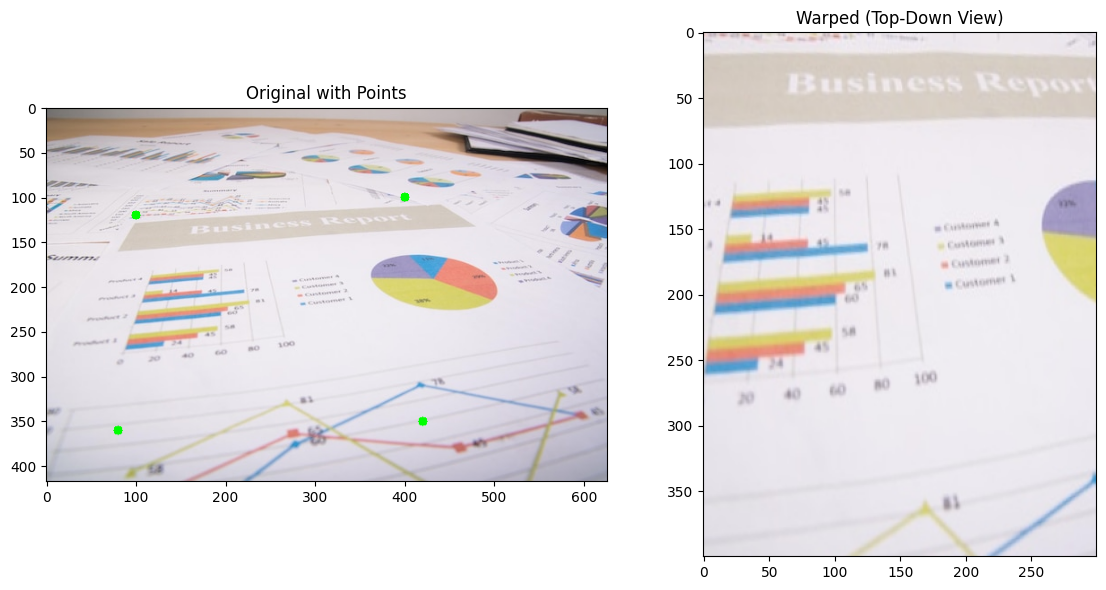

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('13.png')
orig = img.copy()

# Manually specify 4 source points (corners in skewed image)
# Order: top-left, top-right, bottom-right, bottom-left
pts_src = np.array([[100, 120], [400, 100], [420, 350], [80, 360]], dtype=np.float32)

# Target rectangle dimensions (e.g., for A4 paper)
width, height = 300, 400
pts_dst = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype=np.float32)

# Compute perspective transform matrix and warp
M = cv2.getPerspectiveTransform(pts_src, pts_dst)
warped = cv2.warpPerspective(img, M, (width, height))

# Visualization
for pt in pts_src:
    cv2.circle(orig, tuple(pt.astype(int)), 5, (0,255,0), -1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)), plt.title('Original with Points')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)), plt.title('Warped (Top-Down View)')
print("Perspective rectification using 4-point homography")
plt.tight_layout()
plt.show()
